## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance? 
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting? 
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

*My answers:*
1. Regression is for predicting a numerical value (for instance house price) while classification is choosing between certain classes (for instance identifying dogs vs cats).
2. A confusion table compares the model's predictions to the actual values, putting true positives and negatives versus false positives and negatives in a matrix. This allows us to gain insights into a model's performance as we can get an understanding of its precision and recall, which are classification metrics that compare these true/false positives and negatives. For instance, if the diagonal of the confusion table/matrix has the most values, that indicates more true positives and true negatives (which is desired as it means higher accuracy because the model is predicting the correct values).
3. Accuracy is one of the most straightforward metrics for a classifier's performance, as it is simply the percentage of correct predictions out of the total number of predictions. It may not be entirely sufficient because it doesn't reveal anything about how many of the incorrect predictions were false positives/negatives, which is an important consideration depending on the use case. For instance, in the case of medical models it would be better to have false positives (better to be safe than sorry) over false negatives.
4. The root mean squared error quantifies the distance between the predicted and actual values, so a smaller RMSE is ideal when considering a model's performance.
5. Overfitting is when the model learns the training data too well and is not very generalizable; this typically presents as a model with very high training accuracy and low training loss, but very low test accuracy and high test loss. Overfitting can be caused by a model that is too complex or has too much noise so it, in a sense, "memorizes" the training data instead of learning overall patterns that are generally applicable. On the other hand, underfitting is when the model is too simple to learn the patterns of the data, resulting in poor accuracy on both the training and test sets.
6. Splitting the data into training and test sets is necessary to ensure the model has a chance to learn patterns and then apply those on completely new data; this is analagous to taking practice tests and then evaluating your learning on the real exam. Choosing k by evaluating accuracy/RMSE is essential to find the value that is most ideal for that model and data. Training and test sets help prevent the ideal value of k being 1 (just predicting the value itself), and testing out several options for k can help isolate the valeue that results in the highest accuracy/RMSE.
7. Reporting a class label (hard classification) is more straightforward and offers a clear result (for instance is the image a dog or a cat), but it fails to offer a more nuanced perspective into the confidence of that classification. For instance maybe the model is only 51%  sure that the image is a dog, which might as well be a coin flip. A probability distribution over class labels (soft classification) on the other hand can provide the confidence scores which is important context, but this type of classification is harder to interpret and might not be suitable for more simple use cases.  

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

    voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0          1
2  0.287009  0.272727   0.0          1
3  0.256284  0.454545   0.0          1
4  0.262840  0.545455   0.0          1
Index(['voltage', 'height', 'soil', 'mine_type'], dtype='object')
mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64
          voltage      height        soil
count  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550
std      0.195819    0.306043    0.344244
min      0.197734    0.000000    0.000000
25%      0.309737    0.272727    0.200000
50%      0.359516    0.545455    0.600000
75%      0.482628    0.727273    0.800000
max      0.999999    1.000000    1.000000


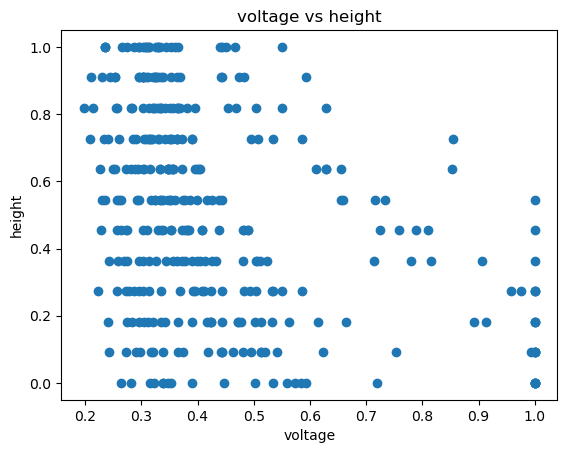

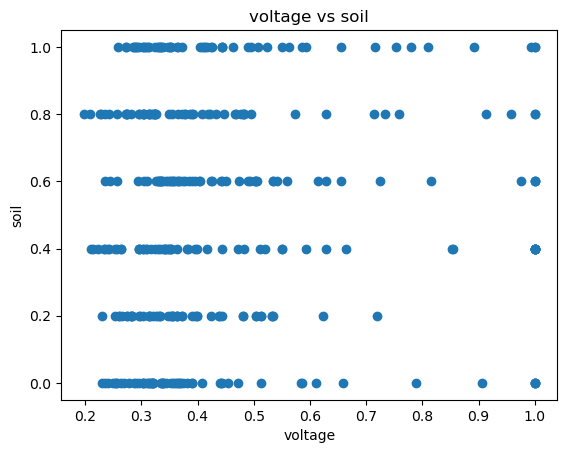

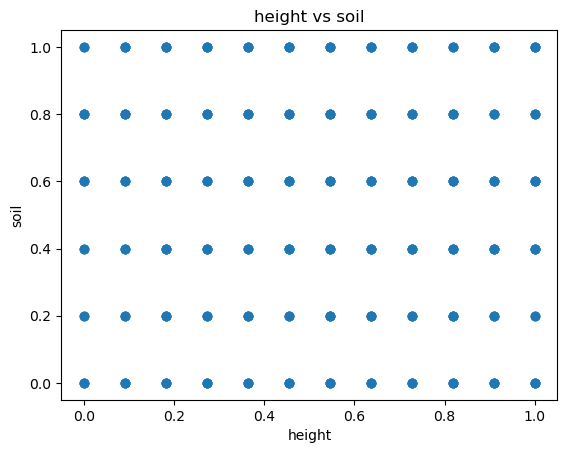

In [5]:
### 2.1
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv("data/land_mines.csv")
print(df.head())
print(df.columns)
print(df["mine_type"].value_counts().sort_index())
print(df[["voltage", "height", "soil"]].describe())

plt.scatter(df["voltage"], df["height"])
plt.xlabel("voltage")
plt.ylabel("height")
plt.title("voltage vs height")
plt.show()

plt.scatter(df["voltage"], df["soil"])
plt.xlabel("voltage")
plt.ylabel("soil")
plt.title("voltage vs soil")
plt.show()

plt.scatter(df["height"], df["soil"])
plt.xlabel("height")
plt.ylabel("soil")
plt.title("height vs soil")
plt.show()

In [7]:
### 2.2 
X = df[["voltage", "height", "soil"]]
y = df["mine_type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2.3
''' 
I select k by training the model on several different values of k and choosing the one that gives the best test accuracy.
'''

best_k = None
best_acc = -1

for k in range(1, 31):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    if acc > best_acc:
        best_acc = acc
        best_k = k

print("Best k:", best_k)
print("Best test accuracy:", best_acc)

best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

### 2.4
''' 
Performance is more accurate for classes 1 and 2 (and somewhat for class 3), and less accurate for classes 4 and 5.
'''
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4, 5])
cm_df = pd.DataFrame(cm, index=[1, 2, 3, 4, 5], columns=[1, 2, 3, 4, 5])
cm_df

Best k: 3
Best test accuracy: 0.47337278106508873


,1,2,3,4,5
1,22,0,5,2,8
2,0,28,1,4,0
3,7,2,16,2,5
4,11,4,8,5,8
5,4,1,11,6,9


In [ ]:
### 2.5
'''  
Predicting the mine type is important for determining how to safely disarm the mine, so it is important to have a model that can accurately predict the mine type. 
However, it should be taken into account that the model is not always accurate, especially since the overall accuracy is only around 50%. Additionally, the model is
less accurate for certain mine types, which should be considered. For instance, if the model predicts a mine is type 1 or 2, it is more likely to be correct than if 
it predicts a mine is type 4 or 5. Therefore, the model's predictions should be used as one piece of information among many when making decisions about how to disarm mines, 
and not as the sole basis for those decisions.
'''

"  \nPredicting the mine type is important for determining how to safely disarm the mine, so it is important to have a model that can accurately predict the mine type. \nHowever, it should be taken into account that the model is not always accurate, especially since the overall accuracy is only around 50%. Additionally, the model is\nless accurate for certain mine types, which should be considered. For instance, if the model predicts a mine is type 1 or 2, it is more likely to be correct than if \nit predicts a mine is type 4 or 5. Therefore, the model's predictions should be used as one piece of information among many when making decisions about how to disarm mines, \nand not as the sole basis for those decisions.\n"

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654 (2499, 3)
price      0
year       0
mileage    0
dtype: int64
k=3, MSE=147993702.1862222


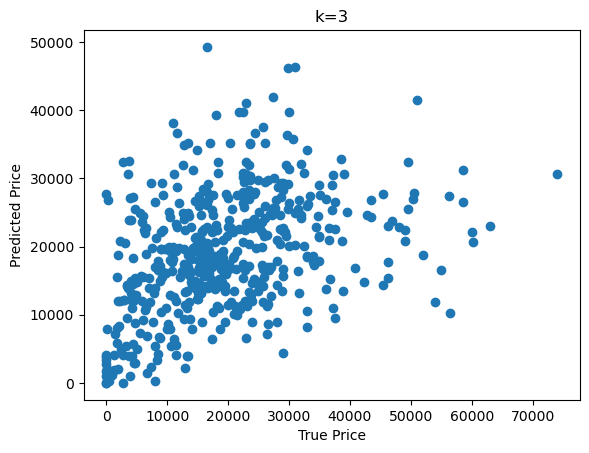

k=10, MSE=117399126.10604002


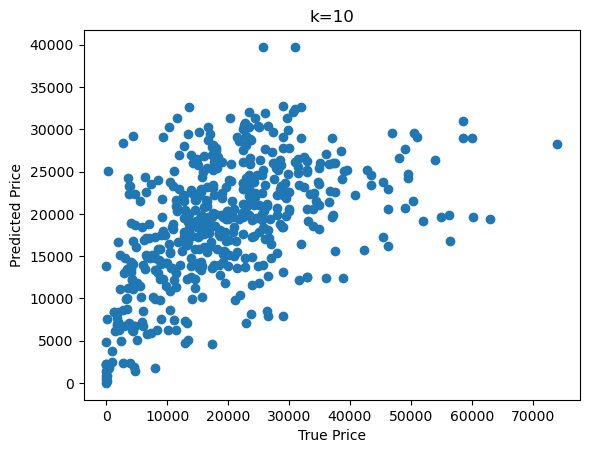

k=25, MSE=112574337.59190078


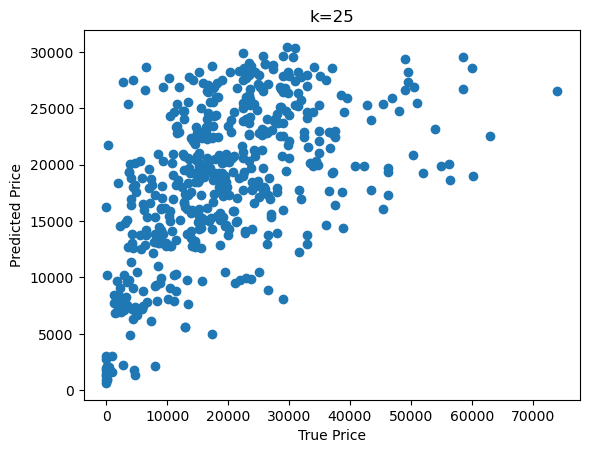

k=50, MSE=110202549.3014296


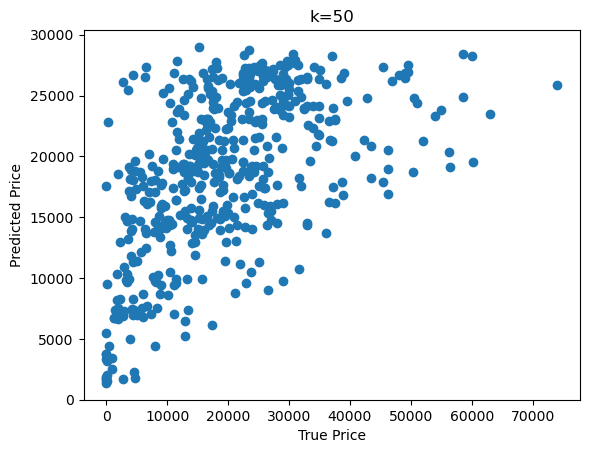

k=100, MSE=112266063.3374672


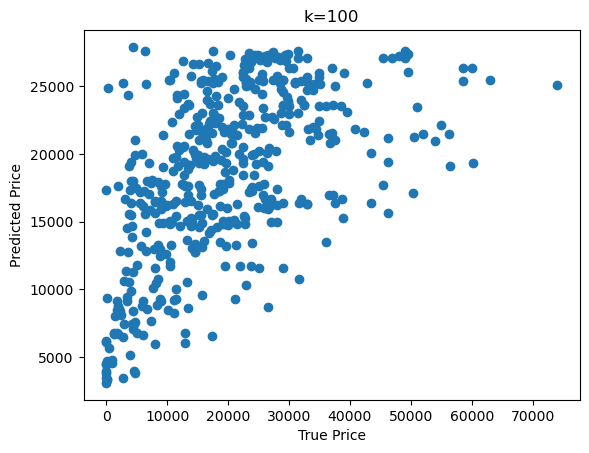

k=300, MSE=114500475.01771589


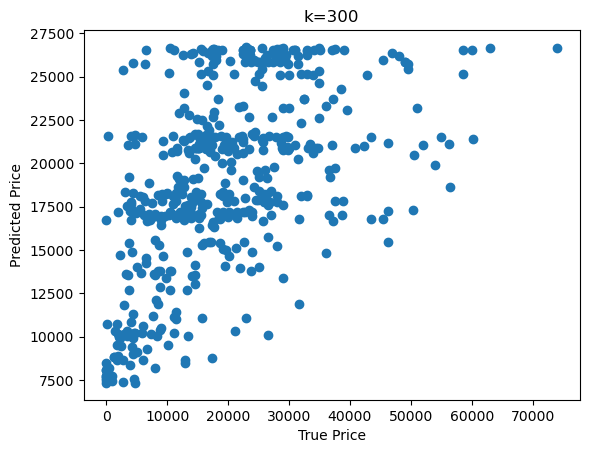

Best k: 50, Best MSE: 110202549.3014296


" \nWhen k is very small (like k = 3), the plots are very noisy and scattered because the model is \nrelying on only a few of the nearby points; this makes the model sensitive to random fluctuations in the data,\nresulting in overfitting since the model is trying too hard to match the training data and can't generalize well.\n\nWhen k is around its optimal value (like k = 50), the predictions are more accurate and less noisy.\n\nWhen k is very large (like k = 300), the predictions are less accurate and more biased because the model is looking \nat too many points, including those that are far away and not relevant to the specific test point. This results in\nunderfitting since the model is too simple to capture the underlying patterns in the data.\n"

In [8]:
### 3.1
df = pd.read_csv("./data/USA_cars_datasets.csv")
df = df[["price", "year", "mileage"]]
print(df.head(), df.shape)
print(df.isna().sum())     # no NA values to handle

### 3.2
def minmax(x):
    u = (x - min(x)) / (max(x) -  min(x))
    return u
    
df["year_norm"] = minmax(df["year"])
df["mileage_norm"] = minmax(df["mileage"])

### 3.3
X = df[["year_norm", "mileage_norm"]]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.4
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

best_k = None
best_mse = float("inf") 

for k in [3, 10, 25, 50, 100, 300]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"k={k}, MSE={mse}")
    
    if mse < best_mse:
        best_mse = mse
        best_k = k

    plt.scatter(y_test, preds)
    plt.xlabel("True Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k={k}")
    plt.show()

print(f"Best k: {best_k}, Best MSE: {best_mse}")

''' 
As k increases, the model at first performs better, which is reflected by the decreasing MSE. However, after a certain point (k=50), 
the model starts to perform worse, which is reflected by the increasing MSE.
''' 

### 3.5
'''  
The optimal k was 50, as that value of k resulted in the lowest MSE.
'''

### 3.6
''' 
When k is very small (like k = 3), the plots are very noisy and scattered because the model is 
relying on only a few of the nearby points; this makes the model sensitive to random fluctuations in the data,
resulting in overfitting since the model is trying too hard to match the training data and can't generalize well.

When k is around its optimal value (like k = 50), the predictions are more accurate and less noisy.

When k is very large (like k = 300), the predictions are less accurate and more biased because the model is looking 
at too many points, including those that are far away and not relevant to the specific test point. This results in
underfitting since the model is too simple to capture the underlying patterns in the data.
'''

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

k=3, MSE=99.32662597030672
k=5, MSE=88.84248699977393
k=10, MSE=78.16193307709699
k=25, MSE=73.99260809405381
k=50, MSE=72.63775844449468
k=100, MSE=71.76645731404025
Best k: 100
Best MSE: 71.76645731404025


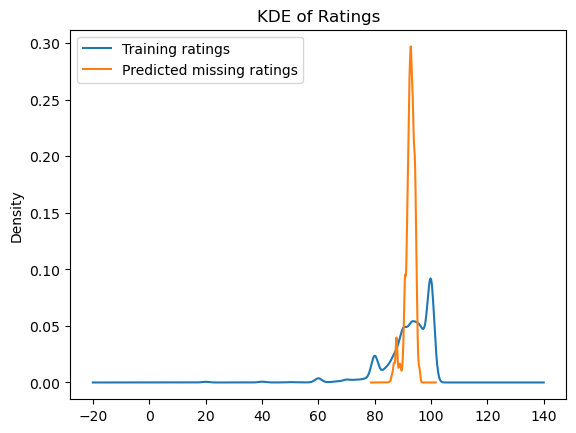

In [ ]:
### 6.1
df = pd.read_csv("data/airbnb_hw.csv")
df = df.loc[:, ["Review Scores Rating", "Price", "Beds"]]

df["Price"] = df["Price"].astype(str).str.replace("$", "").str.replace(",", "")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Beds"] = pd.to_numeric(df["Beds"], errors="coerce")
df["Review Scores Rating"] = pd.to_numeric(df["Review Scores Rating"], errors="coerce")

### 6.2
missing_df = df.loc[df["Review Scores Rating"].isnull()]

### 6.3
df = df.dropna(axis=0, how="any")

### 6.4
X = df[["Price", "Beds"]]
y = df["Review Scores Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_k = None
best_mse = None

for k in [3, 5, 10, 25, 50, 100]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    if best_mse is None or mse < best_mse:
        best_mse = mse
        best_k = k
        
    print(f"k={k}, MSE={mse}")

print("Best k:", best_k)
print("Best MSE:", best_mse)

final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X, y)

### 6.5
X_missing = missing_df[["Price", "Beds"]].dropna()
pred_missing = final_model.predict(X_missing)

missing_df = missing_df.copy()
missing_df["Predicted Rating"] = None
missing_df.loc[X_missing.index, "Predicted Rating"] = pred_missing


### 6.6
'''  
The 2 kde plots do not look similar as the training rating have a much broader distribution while the predicted missing ratings are much more concentrated
around a certain range (80s to 90s). This suggests that the KNN is predicting a certain range of ratings and not actually capturing the full range of 
variability in the data.
'''

plt.figure()
y.plot(kind="kde", label="Training ratings")
pd.Series(pred_missing).plot(kind="kde", label="Predicted missing ratings")
plt.legend()
plt.title("KDE of Ratings")
plt.show()

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)